In [111]:
import pandas as pd
import numpy as np

In [112]:
#Accessing the data of Startups
df=pd.read_csv('dataanalysis.csv')
print(df)
#Total rows 229 and columns 6 in my data

                       Company Name                   CTC           Sector   \
0      Tricycle Brand Solutions LLP                   NaN     Advertisement   
1                      Social Neeti  10000-15000 /month\t     Advertisement   
2                           Outbuds                   NaN     Advertisement   
3          Harjai Computers Pvt Ltd         Not disclosed  Business Service   
4               Pentagon Consulting                   NaN  Business Service   
..                              ...                   ...               ...   
224       Our Courier and Logistics                   NaN    Transportation   
225  Shriram Automall India Limited                     -    Transportation   
226                   NPJ SOLUTIONS     325000- 500000 pa    Transportation   
227  Otravello Hats Private Limited                   NaN    Transportation   
228   Uber India Technology Pvt Ltd                   NaN    Transportation   

              parameters        values category  
0

In [113]:
print(df.head(5))

                   Company Name                   CTC           Sector   \
0  Tricycle Brand Solutions LLP                   NaN     Advertisement   
1                  Social Neeti  10000-15000 /month\t     Advertisement   
2                       Outbuds                   NaN     Advertisement   
3      Harjai Computers Pvt Ltd         Not disclosed  Business Service   
4           Pentagon Consulting                   NaN  Business Service   

            parameters        values category  
0  Form Of Advertising  social media        A  
1  Form Of Advertising  social media        A  
2  Form Of Advertising  social media        A  
3               Skills          High        A  
4               Skills          High        A  


In [114]:
df.shape#shape of the dataset

(229, 6)

In [115]:
df.info()#the Information showling that it have total 229 datapoints in which the CTC only have 97 non-null datapoint

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  229 non-null    object
 1   CTC           97 non-null     object
 2   Sector        229 non-null    object
 3   parameters    229 non-null    object
 4   values        229 non-null    object
 5   category      229 non-null    object
dtypes: object(6)
memory usage: 10.9+ KB


In [116]:
df.columns

Index(['Company Name', 'CTC', 'Sector ', 'parameters', 'values', 'category'], dtype='object')

In [117]:
df.isnull().sum().sort_values(ascending= False )

CTC             132
category          0
values            0
parameters        0
Sector            0
Company Name      0
dtype: int64

In [118]:
missing = df.isnull().sum().sort_values(ascending= False)
percent = (missing/df.isnull().count())*100
print("Percentage of missing data")
percent

Percentage of missing data


CTC             57.641921
Company Name     0.000000
Sector           0.000000
category         0.000000
parameters       0.000000
values           0.000000
dtype: float64

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import squarify
import os

In [120]:
plt.figure(figsize=(15,8))
categorytype=df['category'].value_counts()
print(categorytype)#these are the categories for the companies

A    100
B     92
C     33
D      4
Name: category, dtype: int64


<Figure size 1080x576 with 0 Axes>

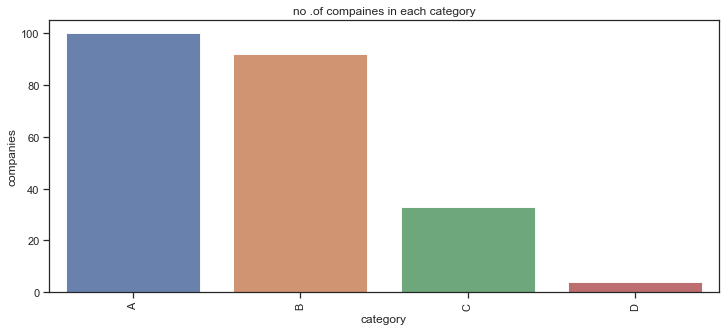

In [121]:
plt.figure(figsize=(12,5))
sns.barplot(categorytype.index ,categorytype.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("category",fontsize=12)
plt.ylabel("companies", fontsize=12)
plt.title("no .of compaines in each category")
plt.show()

In [122]:
sectorwise=df['Sector '].value_counts()
print(sectorwise)

Business Service          69
Technology                52
Manufacturing             25
Healthcare                14
E-Commerce                13
Tourism                   13
Education                 11
Security                   6
Finance                    6
Restaruants                5
Transportation             5
Environmental services     5
Advertisement              3
Entertainment              1
Insurance                  1
Name: Sector , dtype: int64


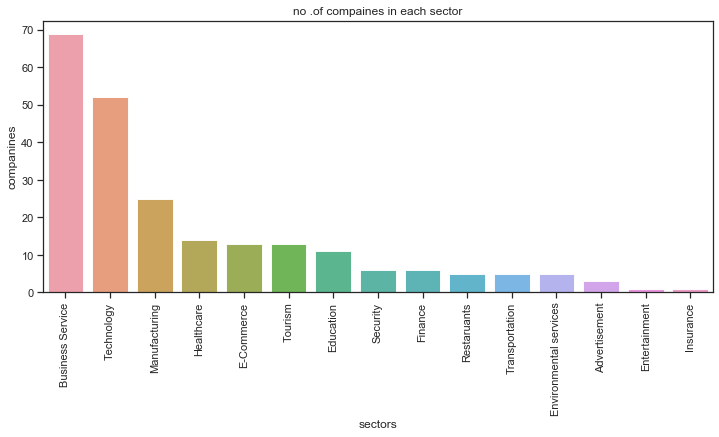

In [123]:
plt.figure(figsize=(12,5))
sns.barplot(sectorwise.index ,sectorwise.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("sectors",fontsize=12)
plt.ylabel("companines", fontsize=12)
plt.title("no .of compaines in each sector")
plt.show()#the bargraph showling the different sectors and the no.of companies in each sector

In [124]:
df['CTC']=df['CTC'].fillna("NA")
print(df['CTC'].values)#defining the NA to nul values

['NA' '10000-15000 /month\t' 'NA' 'Not disclosed' 'NA' 'CTC: 15k to 19k'
 'NA' 'NA' 'Salary: ?15,000.00 to ?30,000.00 /month' '0' 'Not disclosed'
 '0' '0' '8,00,000 - 13,00,000 PA.' '1-2.75LPA' '-'
 'INR 1,00,000 - 2,00,000 PA.' 'Not disclosed'
 '? 16,00,000 - 30,00,000 P.A' 'Rs. 5,00,000 - 15,00,000 P.A' 'Not known'
 '200000-600000' '2,00,000 - 3,00,000 P.A' '2,50,000-3,50,000 P.A.'
 '? 4,00,000 - 6,00,000 P.A.' '2,00,000 - 4,00,000 P.A.'
 '5,00,000 - 8,00,000 P.A' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 '0' 'NA' 'NA' 'NA' 'NA' '8000 /month\t' 'NA' 'NA' 'NA' '12-22k per month'
 '4,50,000 - 6,00,000 P.A' '? 1,75,000 - 2,50,000 P.A.'
 '? 27,50,000 - 32,50,000 P.A.' 'NO' '5,00,000 - 15,00,000 P.A.'
 '3.0?3.25L' '? 3,50,000 - 5,00,000 P.A.' '0' '? 3,00,000 - 5,00,000 P.A.'
 'NA' '0' '8LPA-12LPA' '225000-600000' '425000- 600000 PA' '3.0?5.5L' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' '2-5 Lpa' 'NA' 'NA' 'NA'
 'NA' '-' '1,50,000 - 2,25,000 P.A.' 'NA' 'NA' '3,00,000 - 7,00,000

In [125]:
df.describe()

,Company Name,CTC,Sector,parameters,values,category
count,229,229,229,229,229,229
unique,229,67,15,18,35,4
top,TrioTree Technologies Pvt. Ltd.,NA,Business Service,Skills,High,A
freq,1,132,69,66,62,100


In [126]:
parametersvalue=df['parameters'].value_counts()
print(parametersvalue)

Skills                     66
Adaptability               52
Instruments/Machinery      25
Level Of Care              14
Type Of Service            13
Experience                 11
Sale Of Goods              11
Financial Opportunities     6
Types Of Service            6
Size                        5
Modes                       5
Funding type                4
Skills                      3
Form Of Advertising         3
Sale of Goods               2
Funding level               1
Risk                        1
Funding Type                1
Name: parameters, dtype: int64


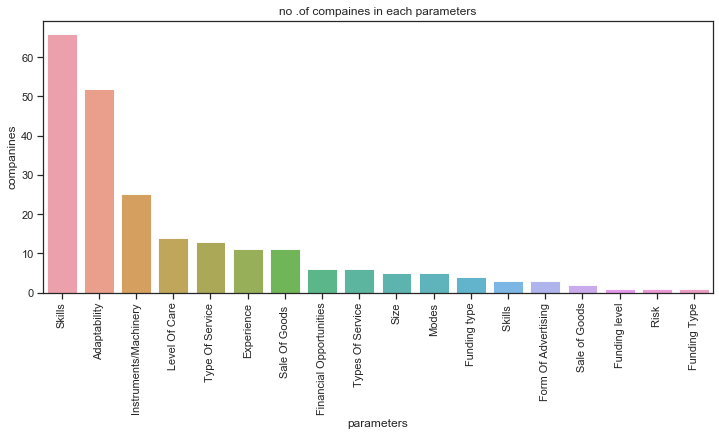

In [127]:
plt.figure(figsize=(12,5))
sns.barplot(parametersvalue.index ,parametersvalue.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("parameters",fontsize=12)
plt.ylabel("companines", fontsize=12)
plt.title("no .of compaines in each parameters")
plt.show()

In [128]:
#converting sector,parameters and category which are non-numarical values to numarical values for our regression model
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['Sector ']= number.fit_transform(df['Sector '].astype('str'))
df['parameters']= number.fit_transform(df['parameters'].astype('str'))
df['category']=number.fit_transform(df['category'].astype('str'))
df.head(5)
#for this we are using one-hot encoding to convert all the non numarical values into numaric

,Company Name,CTC,Sector,parameters,values,category
0,Tricycle Brand Solutions LLP,NA,0,3,social media,0
1,Social Neeti,10000-15000 /month\t,0,3,social media,0
2,Outbuds,NA,0,3,social media,0
3,Harjai Computers Pvt Ltd,Not disclosed,1,14,High,0
4,Pentagon Consulting,NA,1,14,High,0


In [129]:
#then we define our feature set and label set 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
features=['Sector ','parameters']#feature set contain sector and parameters
x_train=df[list(features)].values
y_train= df['category'].values#label set contain only category which we want to predict for each company

In [130]:
print(x_train)

[[ 0  3]
 [ 0  3]
 [ 0  3]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 15]
 [ 1 15]
 [ 1 15]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 1 14]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 12]
 [ 2 12]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 2 11]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 3  1]
 [ 4  5]
 [ 5  4]
 [ 5  6]
 [ 5  6]
 [ 5  6]
 [ 5  6]
 [ 6  2]
 [ 6  2]
 [ 6  2]
 [ 6  2]
 [ 6  2]
 [ 6  2]
 [ 7  8]
 [ 7  8]
 [ 7  8]
 

In [131]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 2 2 0 0 1 1 1 2 0 2 2 3 3 3 0 0 0
 0 0 0 0 0 0 0 1 2 2 3 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 1 1 2 2 2 2
 2 2 0 2 2 2 2]


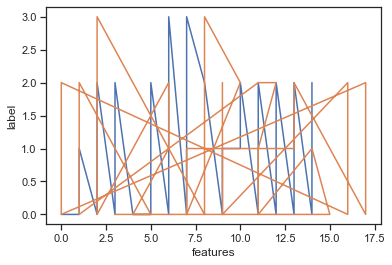

In [132]:
plt.plot(x_train,y_train)
plt.xlabel("features")
plt.ylabel("label")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3053A8988>,
      dtype=object)

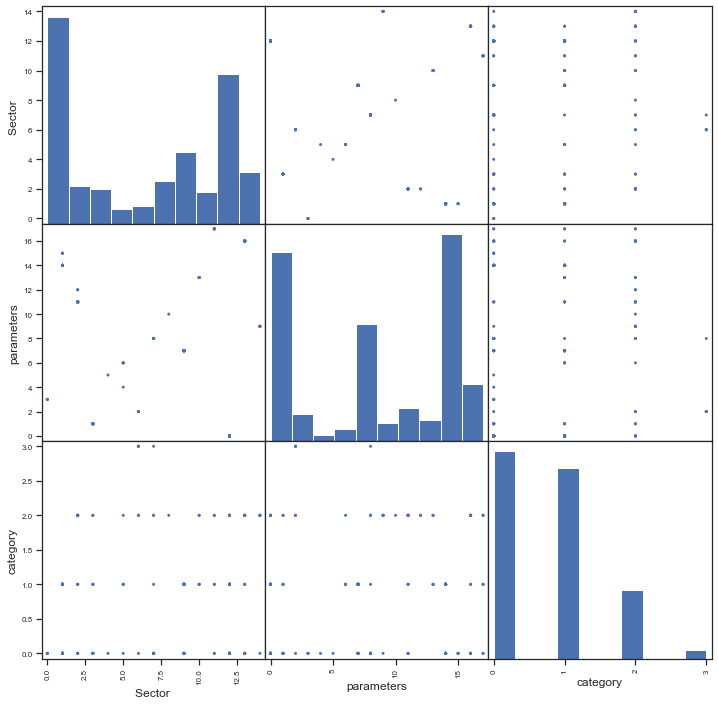

In [133]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)

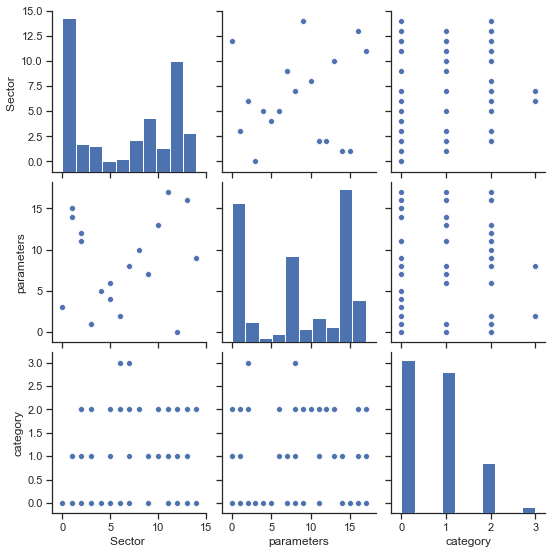

In [134]:
sns.pairplot(df)

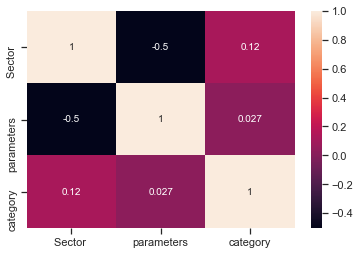

In [135]:
sns.heatmap(df.corr(), annot=True)


In [136]:
from sklearn.model_selection import train_test_split
X_Train,X_test,y_train,y_Test=train_test_split(x_train,y_train,test_size = 0.3)#splitting the data into 70 percent training and 30 percent test

In [153]:
clf=RandomForestClassifier(n_estimators=10050,random_state=20)

In [154]:
clf.fit(X_Train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10050,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [155]:
y_pred=clf.predict(X_test)

In [156]:
from sklearn import metrics
RFR=metrics.accuracy_score(y_Test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))# accuracy is very low in random forest regression 

Accuracy: 0.5072463768115942


In [157]:
clf.predict([[9,3]])

array([0])

In [159]:
errors = abs(y_pred - y_Test)

In [160]:
errors

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 1])

In [161]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.61 degrees.


In [162]:
#Now apply multiple logistic regression for the given dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [163]:
data = pd.read_csv('dataanalysis.csv')
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['Sector ']= number.fit_transform(df['Sector '].astype('str'))
df['parameters']= number.fit_transform(df['parameters'].astype('str'))
df['category']=number.fit_transform(df['category'].astype('str'))
df.head(5)
x=df[['Sector ','parameters']]
y=df['category']

In [164]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [165]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
y_pred=logreg.predict(X_test)

In [167]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25,  0,  0,  0],
       [27,  0,  0,  0],
       [ 5,  0,  0,  0],
       [ 1,  0,  0,  0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

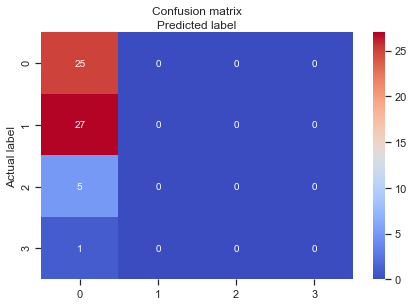

In [168]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [169]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43103448275862066


In [170]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.5


In [171]:
logreg.predict([[9,3]])

array([0])

In [174]:
#my dataset is not perfect maybe it cantains noise in its feature but it gives 